Decision trees are used to classify (or estimate continuous values) by partitioning the sample space as efficiently as possible into sets with similar data points until you get to (or close to) a homogenous set and can reasonably predict the value for new data points.

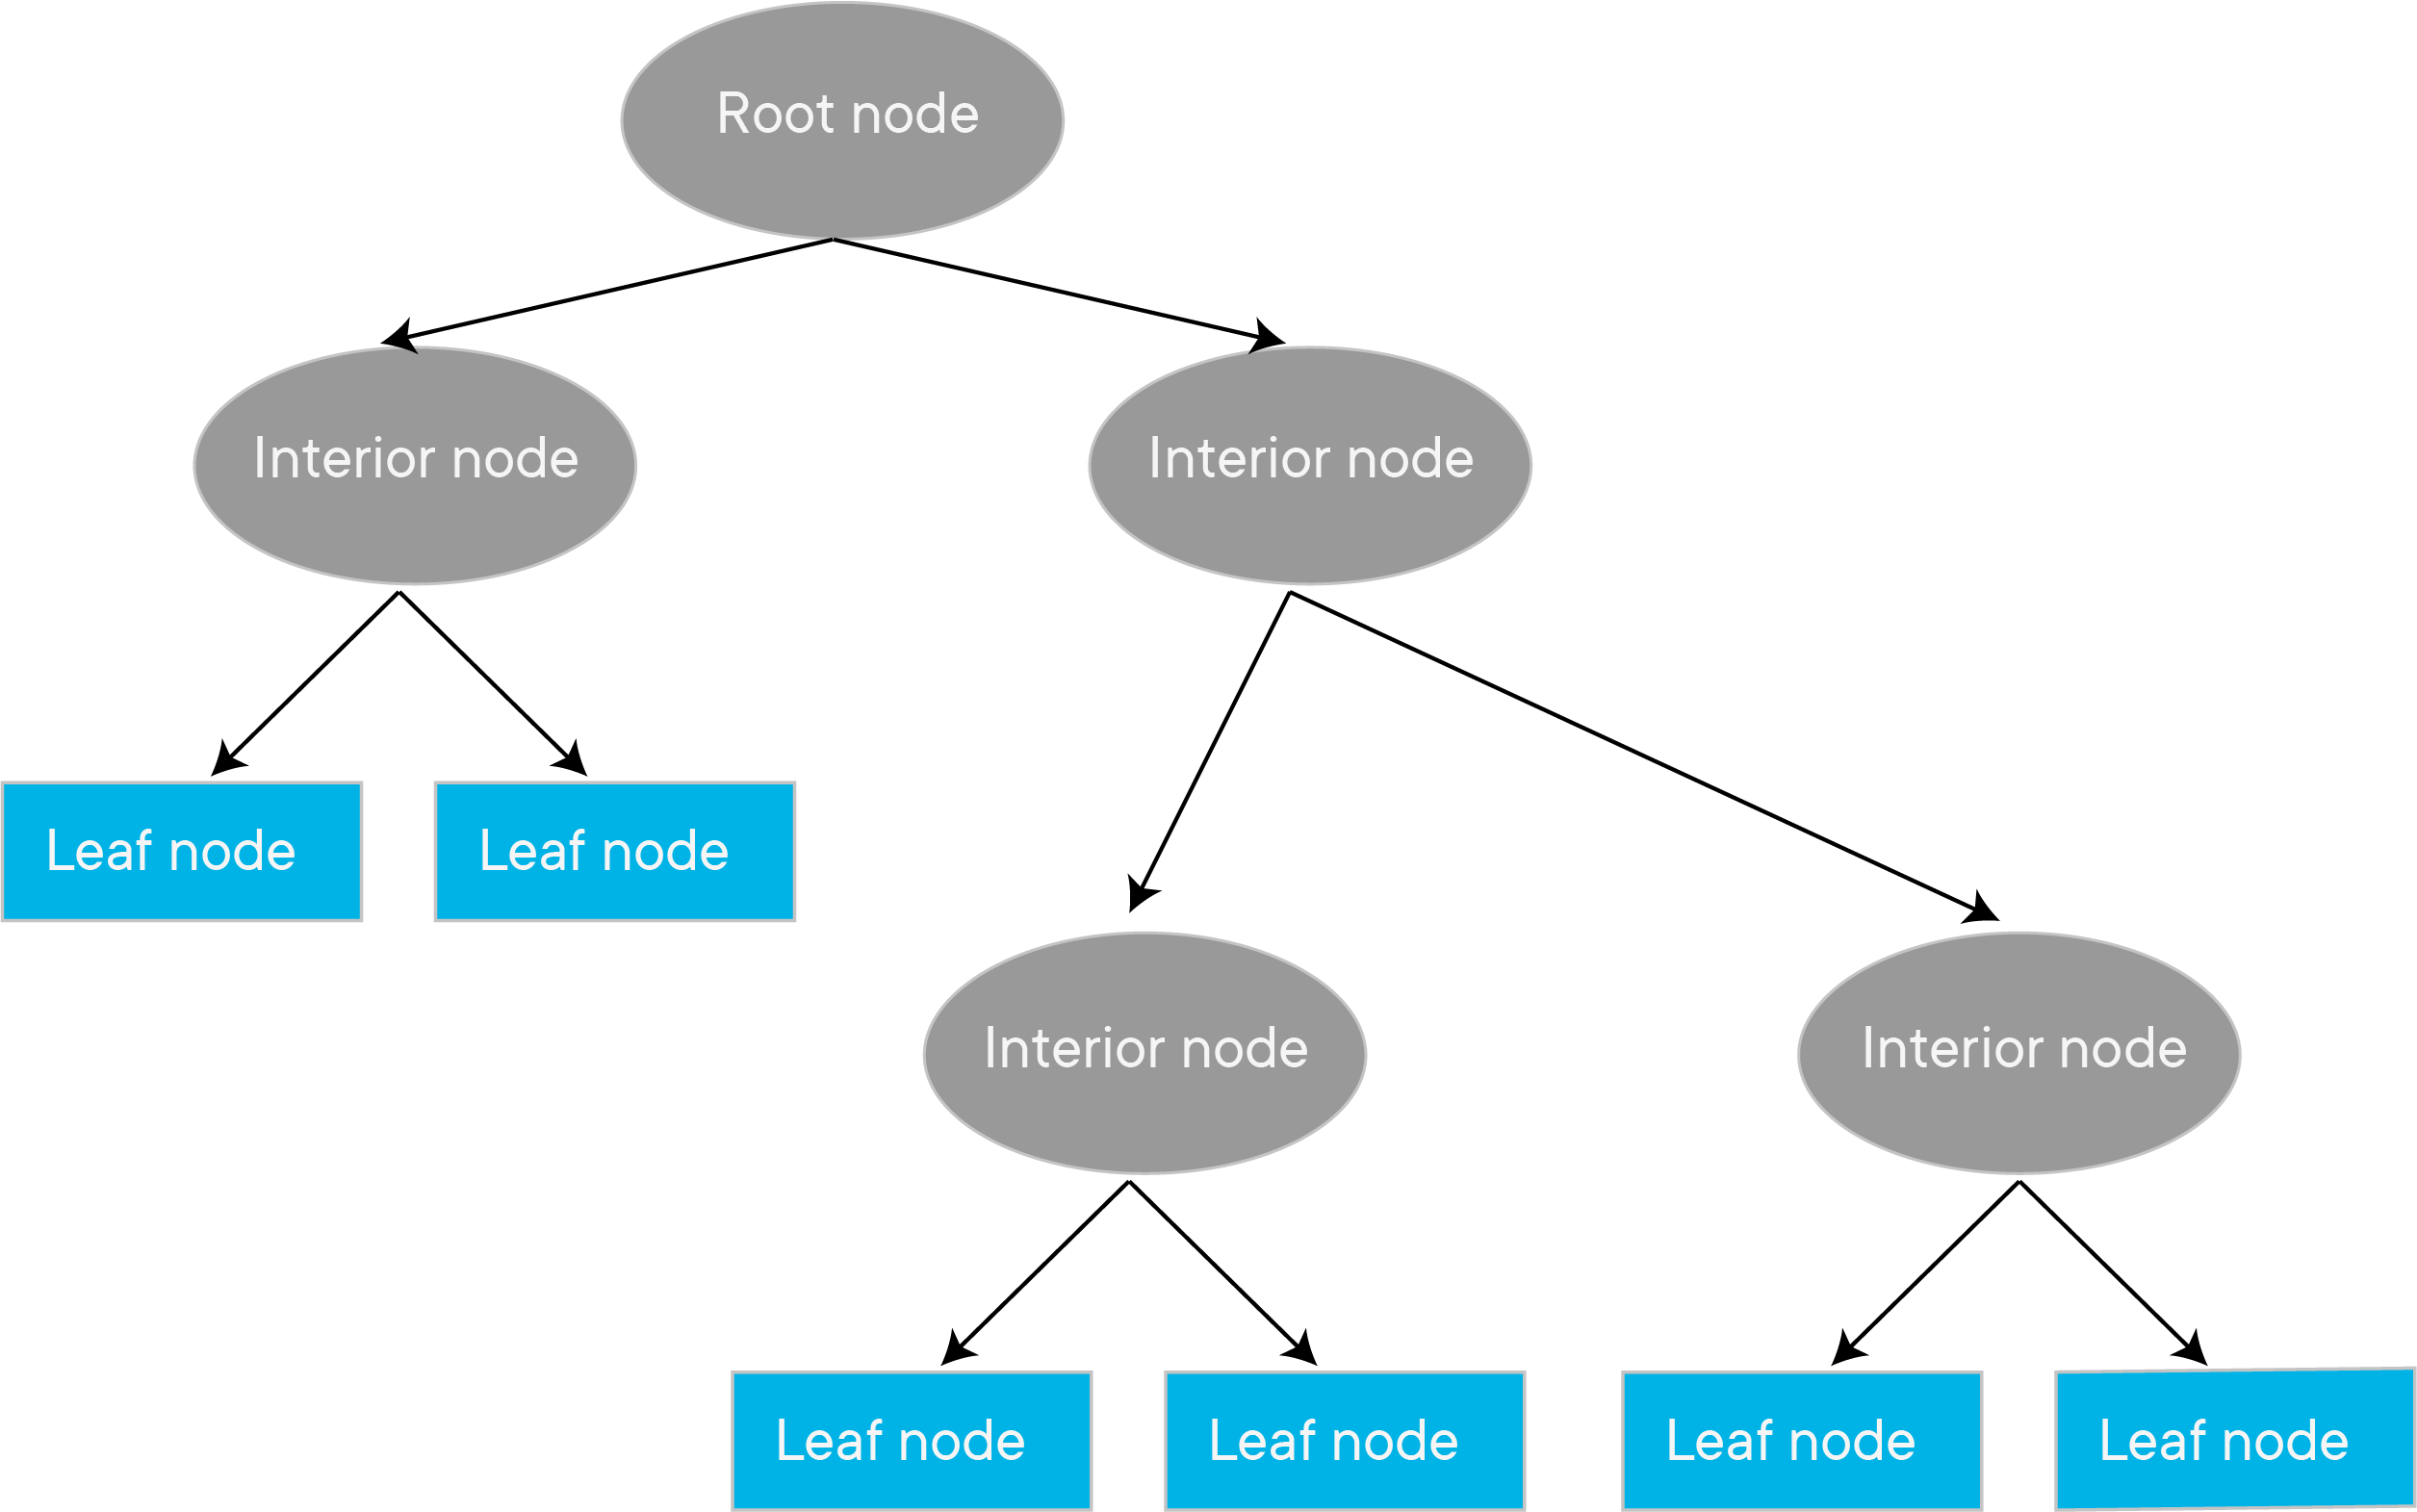

This is the basic idea behind decision trees: every internal node checks for a condition and performs a decision, and every terminal node (AKA leaf node) represents a discrete class. Decision tree induction is closely related to rule induction. In essence, a decision tree is a just series of IF-ELSE statements (rules). 

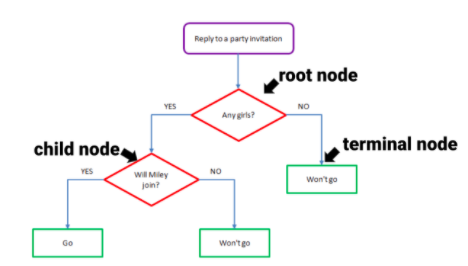

**Entropy** : Entropy is a measure of disorder or uncertainty.

In terms of data, we can informally describe entropy as an indicator of how messy your data is.  A high degree of entropy always reflects "messed-up" data with low/no information content. The uncertainty about the content of the data, before viewing the data remains the same (or almost the same) as that before the data was available. 

In a nutshell, higher entropy means less predictive power when it comes to doing data science with that data. 


**Entropy will always be between 0 and 1. The closer to 1, the more disordered your group.**

To repeat, in the present case we have only two groups of interest: the payers (2/5) and the non-payers (3/5).

So our entropy for this toy dataset is:

>  −0.4∗log2(0.4)−0.6∗log2(0.6) .

Let's use the math library to calculate this:

In [3]:
import math

-.4*math.log(.4, 2) - .6*math.log(.6, 2)

0.9709505944546686

*When the classes are split equally,  𝑝=0.5  and  𝑞=1−𝑝=0.5 , the entropy value is at its maximum, 1.*

## Information gain 

> Information gain is an impurity/uncertainty based criterion that uses the entropy as the measure of impurity.__ 

When we measure information gain, we're really measuring the difference in entropy from before the split (an untidy sock drawer) to after the split (a group of white socks and underwear, and a group of non-white socks and underwear).

## Necessary Imports (for Scikit learn decision trees)

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

### 1) Split into train/test split

In [ ]:
X = df.loc[:, ['outlook', 'temp', 'humidity', 'windy']]
y = df.loc[:, 'play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### 2) OneHotEncode

In [ ]:
# One-hot encode the training data and show the resulting DataFrame with proper column names
ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

ohe_df.head()

### 3) Train the decision tree

In [ ]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_ohe, y_train)

### 4) Plot the decision tree

In [ ]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=ohe_df.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### 5) Evaluate the predictive performance

In [ ]:
X_test_ohe = ohe.transform(X_test)
y_preds = clf.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))

# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

-------

## Tuning and Pruning 

> __This process of trimming decision trees to optimize the learning process is called "tree pruning".__

We can prune our trees using:

- Maximum depth: Reduce the depth of the tree to build a generalized tree. Set the depth of the tree to 3, 5, 10 depending after verification on test data

- Minimum samples leaf with split: Restrict the size of sample leaf

- Minimum leaf sample size: Size in terminal nodes can be fixed to 30, 100, 300 or 5% of total

- Maximum leaf nodes: Reduce the number of leaf nodes

- Maximum features: Maximum number of features to consider when splitting a node